# Problem statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:
1> Which variables are significant in predicting the price of a house, and
2> How well those variables describe the price of a house.

# Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Step1: Importing and understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

housing = pd.read_csv("train.csv")
housing.head()
#import os
#directory_path = os.getcwd()
#print("My current directory is : " + directory_path)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
housing.shape

(1460, 81)

## Step 2: Data Cleaning
- Drop duplicates records
- Identify columns with missing values and drop them if a huge percentage of data is missing
- Handle null values in categorical columns
- Handle null values in numeric columns
- Identify columns that are highly skewed and drop them
- Data conversion
- Identify columns that can be dropped

In [4]:
# drop duplicate records if any
housing.drop_duplicates(subset=None, inplace=True)
housing.shape

(1460, 81)

In [5]:
# express missing values per column as % of total lumber of values to check for column level density
missing = round(100*(housing.isnull().sum()/len(housing.index)), 2)
missing[missing> 0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [6]:
# It can be seen that Alley, PoolQC, Fence and MiscFeature has more than 80% data missing and hence are eligible for being dropped  
housing = housing.drop(missing[missing> 80].index, axis=1)
housing.shape

(1460, 77)

In [7]:
# check  null values in all categorical columns
housing.select_dtypes(include='object').isnull().sum()[housing.select_dtypes(include='object').isnull().sum()>0]

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [8]:
# replace null values in categorical columns with none value

for col in ('MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):    
    housing[col] = housing[col].fillna('None')
    
# here we have only 1 null value and NA is not an option as per the dictionary. Hence replacing null with mode of this column
housing.Electrical.replace(np.nan,housing.Electrical.mode()[0],inplace=True)

In [9]:
# check  null values in all numeric columns
housing.select_dtypes(include=['int64','float']).isnull().sum()[housing.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

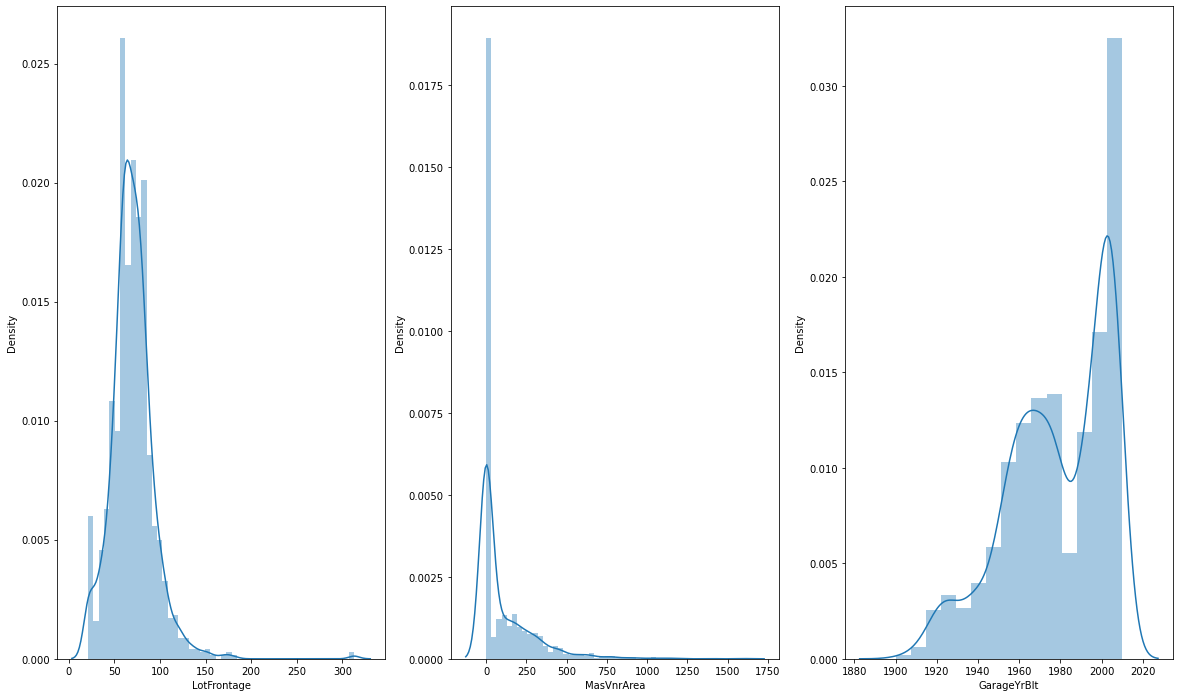

In [10]:
# plot graph to check data pattern
plt.figure(figsize=(20, 12))
plt.subplot(1, 3, 1)
sns.distplot(housing.LotFrontage)
plt.subplot(1,3,2)
sns.distplot(housing.MasVnrArea)
plt.subplot(1,3,3)
sns.distplot(housing.GarageYrBlt)
plt.show()

In [11]:
# replacing missing values with median
housing.LotFrontage.replace(np.nan,housing.LotFrontage.median(),inplace=True)
housing.MasVnrArea.replace(np.nan,housing.MasVnrArea.median(),inplace=True)

In [12]:
# number of missing records in Garage related variables is same as noticed in other categorical garage related variables- 81. 
# In categorical variables we replaced it by NA with the assumption that no garage is available. 
# In this numeric column we can replace it by 0
housing.GarageYrBlt.replace(np.nan,0,inplace=True)

In [13]:
# check for columns with highly skewed data (more than 95% data in column is associated with same value)

cols=housing.select_dtypes(['int64','float64','object']).columns

skewed_cols = []

for col in cols:
    if ((housing[col].value_counts().max()*100)/len(housing.index)) > 95:
        skewed_cols.append(col)
        
print(skewed_cols)
    
#print(max(list(housing['Street'].value_counts(normalize=True).sort_values(ascending=False).head(1))))

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


All the above columns have highly skewed data (i.e. more than 95% of the columns have the same value). Hence these columns can be dropped from the dataframe for further analysis

In [14]:
housing.drop(skewed_cols, axis = 1, inplace = True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  Exterior

In [15]:
# Data conversion - Converting years column to number of years since current year 2021
housing['HouseAge'] = 2021 - housing.YearBuilt
housing['RemodelAge'] = 2021 - housing.YearRemodAdd
housing['GarageAge'] = 2021 - housing.GarageYrBlt
housing['SoldAge']= 2021 - housing.YrSold

In [16]:
# now we can drop the columns YearBuilt, YearRemodAdd, GarageYrBlt, YrSold
housing.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis=1,inplace=True)

In [17]:
# check for outlier 
housing.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,HouseAge,RemodelAge,GarageAge,SoldAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,15.060959,6.321918,180921.195890,49.732192,36.134247,152.260274,13.184247
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,55.757415,2.703626,79442.502883,30.202904,20.645407,453.697295,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,11.000000,11.000000,11.000000,11.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,21.000000,17.000000,20.000000,12.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,6.000000,163000.000000,48.000000,27.000000,44.000000,13.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,8.000000,214000.000000,67.000000,54.000000,63.000000,14.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,...,262.000000,130.000000,112.000000,0.000000,10.000000,278000.000000,96.100000,71.000000,93.000000,15.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,...,335.000000,175.050000,180.150000,160.000000,11.000000,326100.000000,105.000000,71.000000,2021.000000,15.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,...,505.460000,285.820000,261.050000,268.050000,12.000000,442567.010000,121.820000,71.000000,2021.000000,15.000000


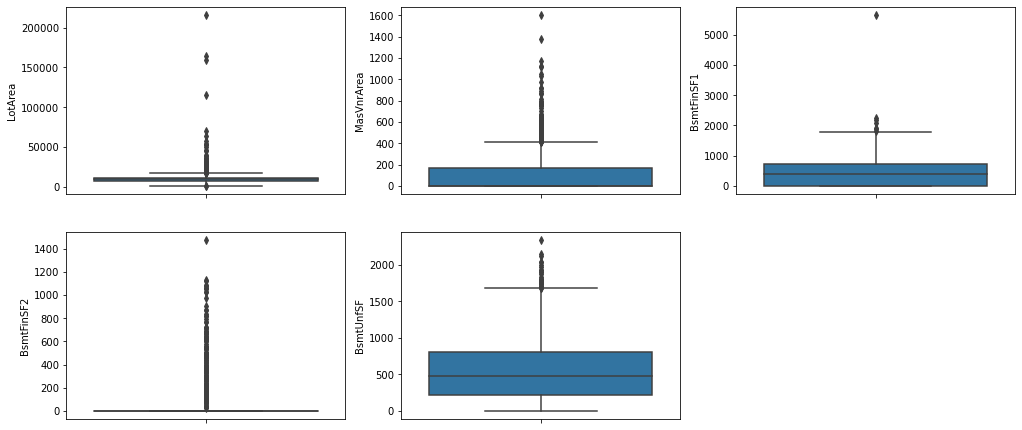

In [18]:
# plotting to check for outliers

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', data = housing)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', data = housing)
plt.subplot(5,3,3)
sns.boxplot(y = 'BsmtFinSF1', data = housing)
plt.subplot(5,3,4)
sns.boxplot(y = 'BsmtFinSF2', data = housing)
plt.subplot(5,3,5)
sns.boxplot(y = 'BsmtUnfSF', data = housing)
plt.show()

As we can see that there are quite a lot of outliers but since the dataset provided is limited we will not remove the outliers

## Step 3: Data visualization
- scatter plot for continuous numeric variables
- bar plot for discrete numeric variables
- box plot for the continous variables

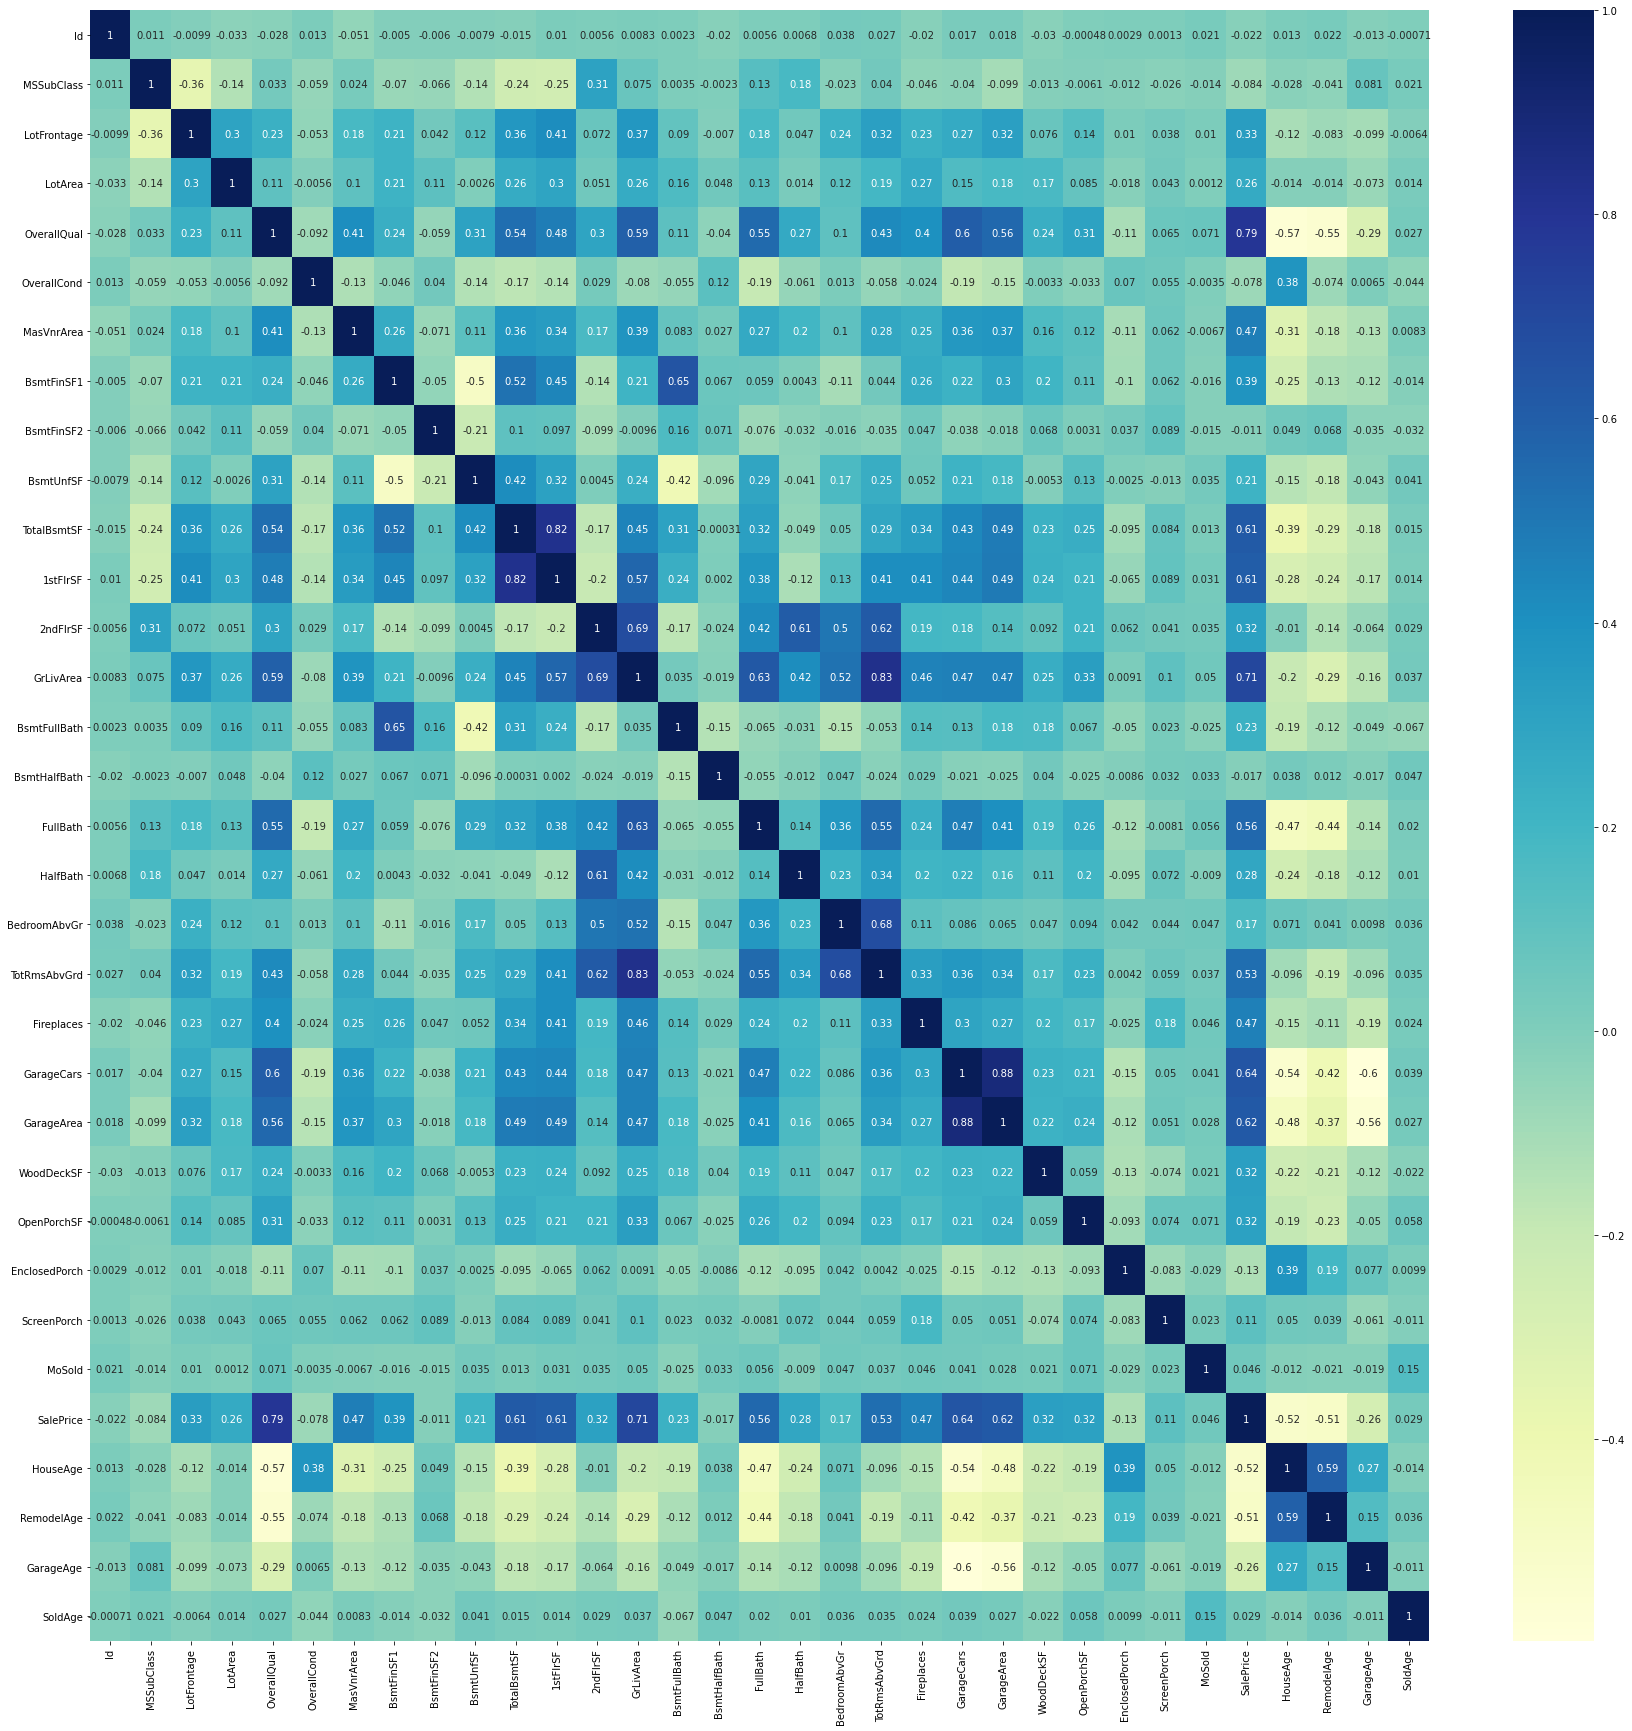

In [19]:
# check correlation matrix to identify if any columns are highly correlated and can be dropped
corrmat = housing.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corrmat,cmap="YlGnBu", annot=True)
plt.show()

<b>Observations</b>:
- From the heatmap we can conclude Id column can be dropped as its unique for all records
- There is high coorelation between the columns (TotRmsAbvGrd & GrLivArea), (GarageArea & GarageCars), (TotalBsmtSF & 1stFlrSF)
- Following columns are highly coorelated to SalePrice - OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath

In [20]:
# dropping columns on basis of points 1 & 2 above
housing.drop(['Id', 'TotRmsAbvGrd', 'GarageArea', '1stFlrSF'], axis = 1, inplace = True)

## Visualization for the features
- scatter plot for continuous numeric variables
- bar plot for discrete numeric variables
- box plot for the continous variables

In [21]:
# identify numeric features
numerical_features = [x for x in housing.columns if housing[x].dtypes != 'object']
print(numerical_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'SalePrice', 'HouseAge', 'RemodelAge', 'GarageAge', 'SoldAge']


In [22]:
# identify continous numeric variables
continuous_features=[x for x in numerical_features if len(housing[x].unique())>=25]
print(continuous_features)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'HouseAge', 'RemodelAge', 'GarageAge']


<Figure size 720x360 with 0 Axes>

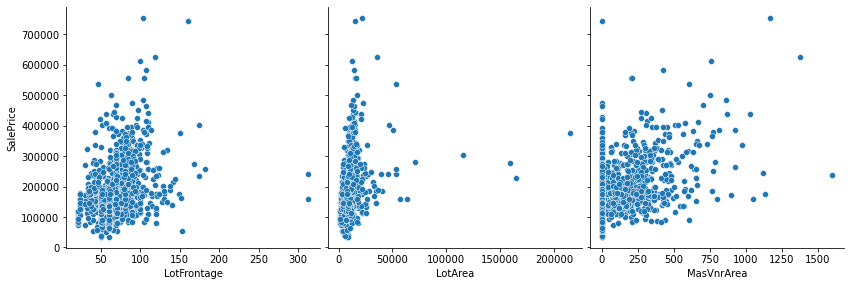

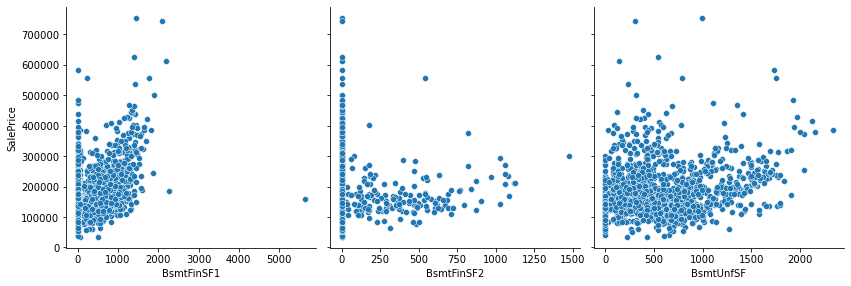

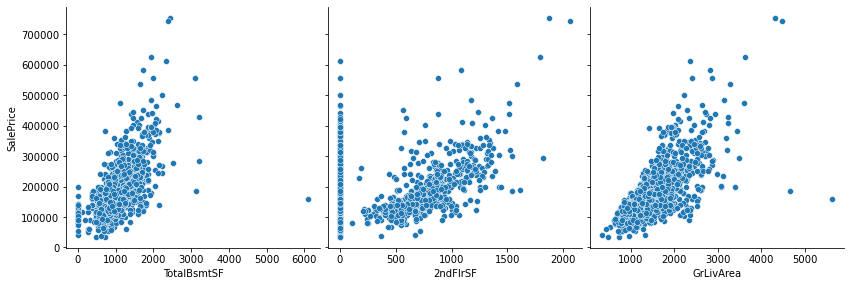

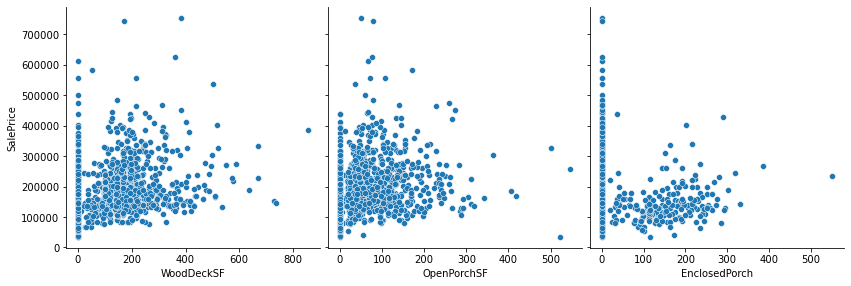

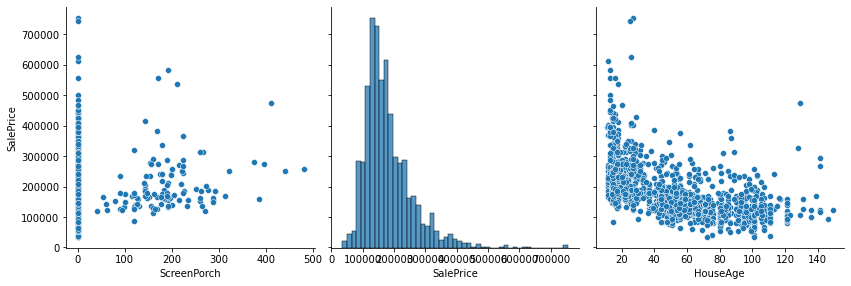

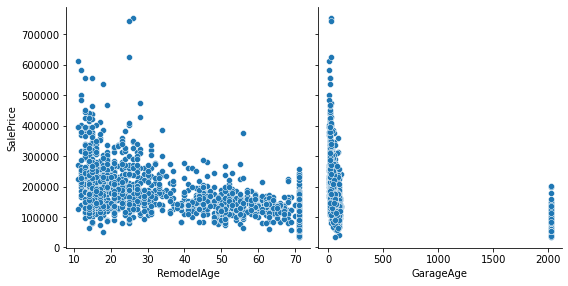

In [23]:
# Check the plots for continous numerical values using pairplots
plt.figure(figsize=(10,5))

sns.pairplot(housing, x_vars=['LotFrontage', 'LotArea', 'MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['TotalBsmtSF', '2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['ScreenPorch', 'SalePrice', 'HouseAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['RemodelAge', 'GarageAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

<b>Observation: </b>
- Evidently GrLivArea, TotalBsmtSF shows a high correlation with salePrice. Rest of the variable scatter plots do not show any clear observation with this plot
- A declining pattern is observed in saleprice vs HouseAge & saleprice vs RemodelAge plot

In [24]:
discrete_features=[x for x in numerical_features if len(housing[x].unique())<25]
print(discrete_features)

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'MoSold', 'SoldAge']


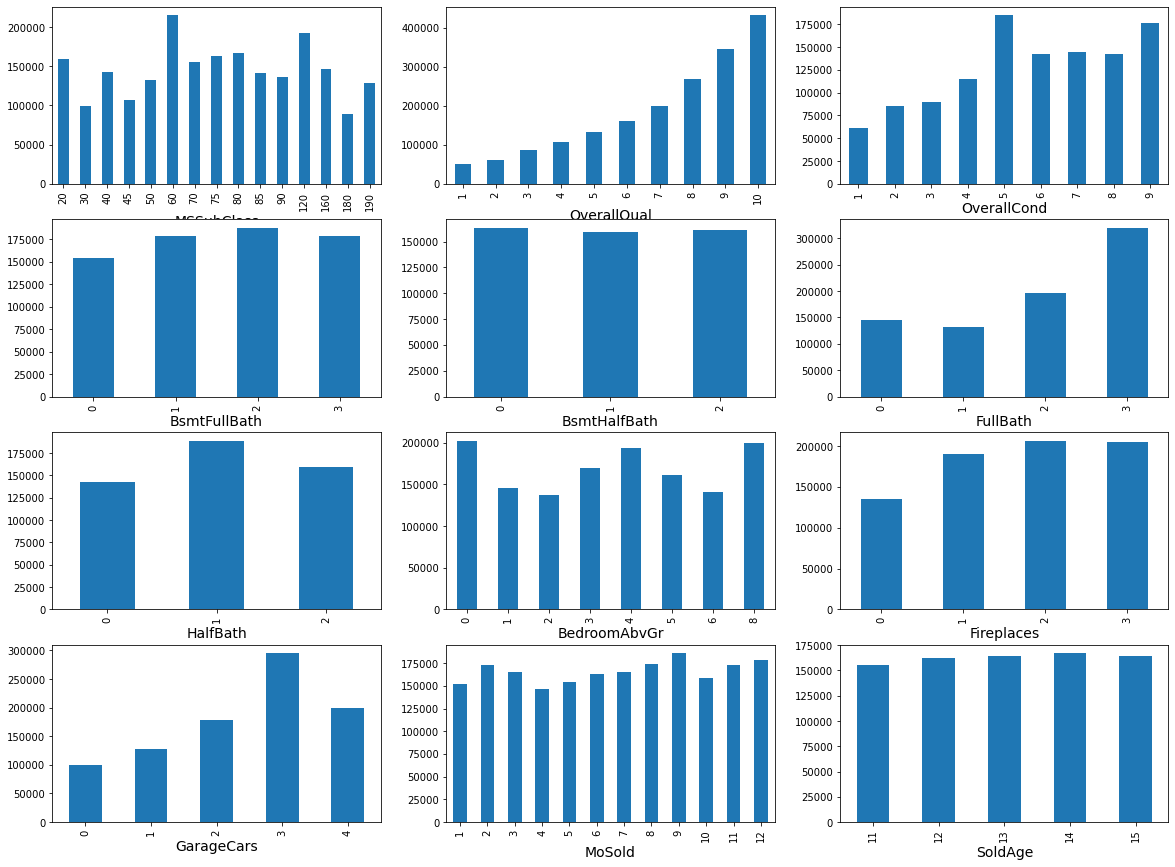

In [25]:
# plotting of discrete features
plt.figure(figsize=(20, 15))

for m,n in enumerate(discrete_features):
    plt.subplot(4,3,(m+1))
    housing.groupby(n).SalePrice.median().plot.bar()
    plt.xlabel(n, fontsize=14)
plt.show()

<b>Observation: </b>
- SoldAge, BsmtHalfBath has no impact on salePrice - the graph is same across all the levels
- Increase in fireplace, OverallQual, FullBath has a positive correlation with SalePrice

In [26]:
# plotting the categorical features
categorical_features = [x for x in housing.columns if housing[x].dtypes == 'object']
print(categorical_features)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


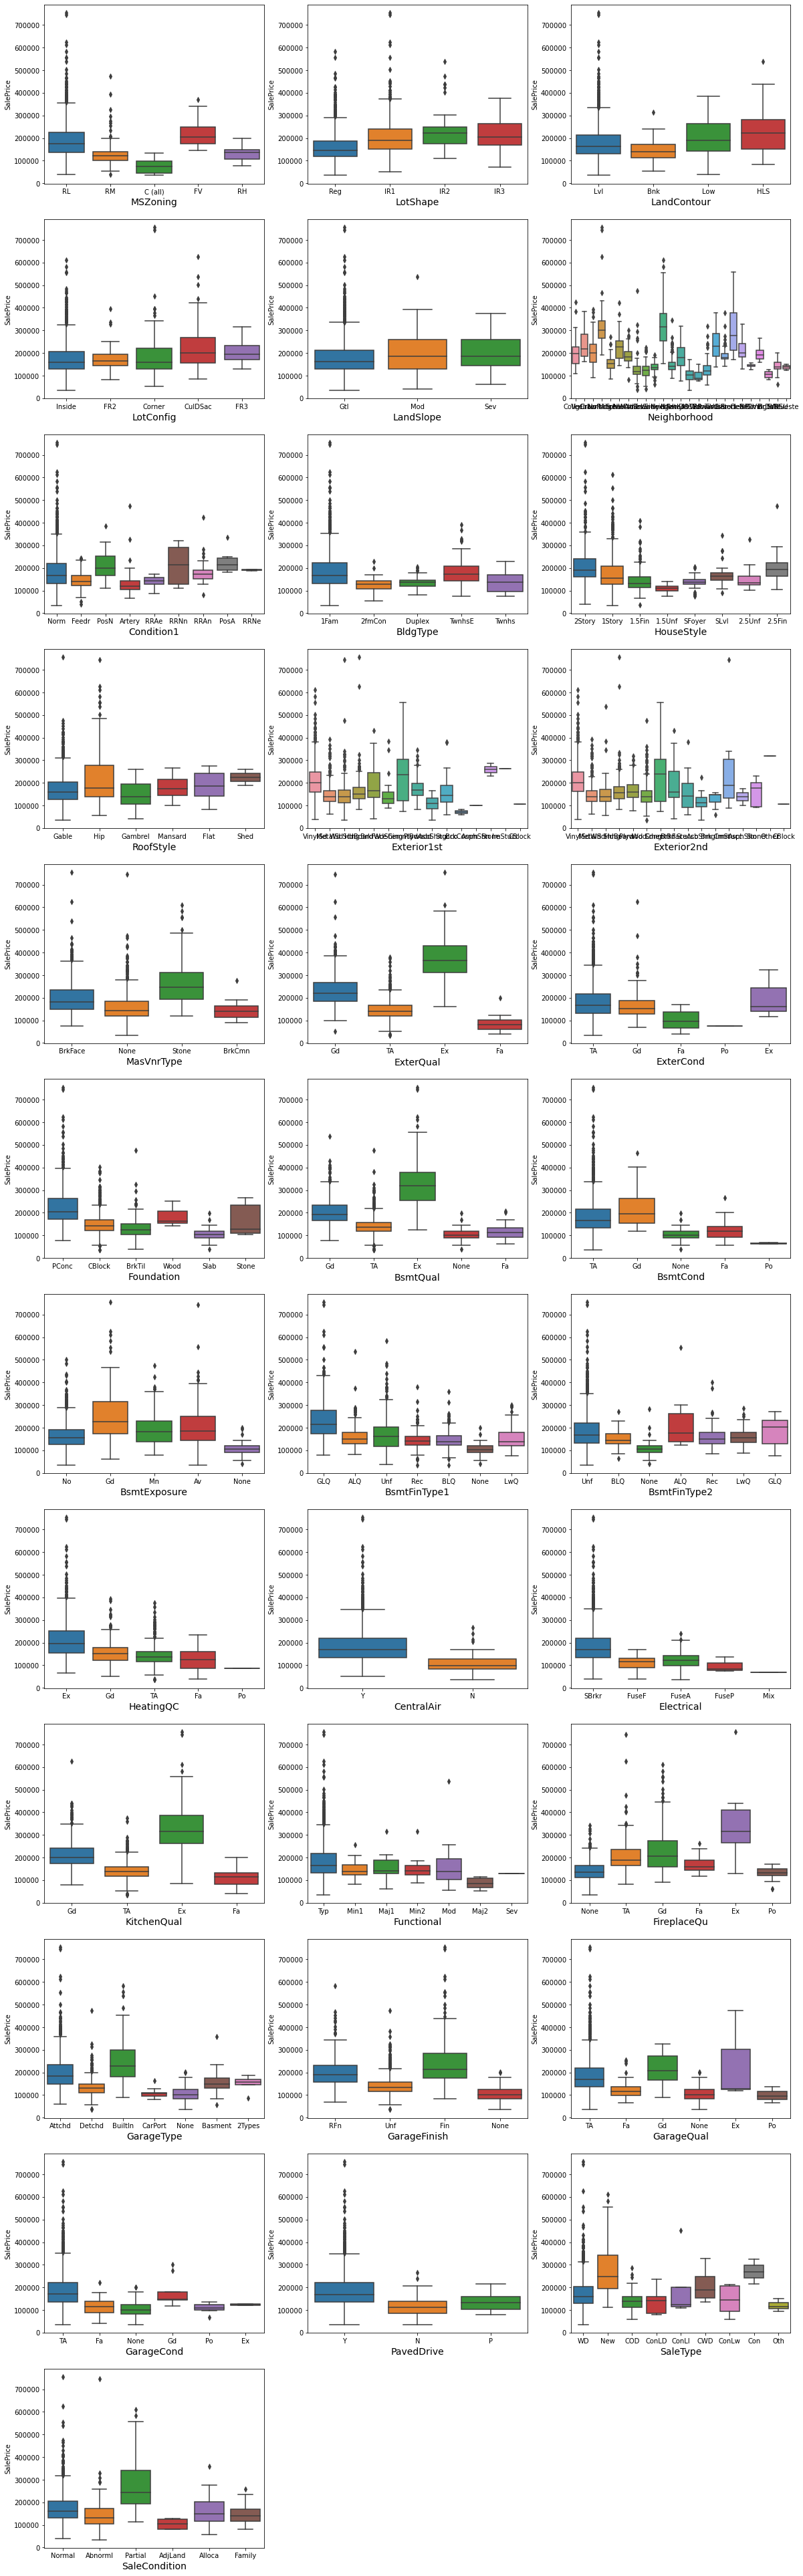

In [27]:
plt.figure(figsize=(20,70))
for m,n in enumerate(categorical_features):
    plt.subplot(12,3,(m+1))
    sns.boxplot(x=n, y='SalePrice',data=housing)
    plt.xlabel(n, fontsize=14)
plt.show()

In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

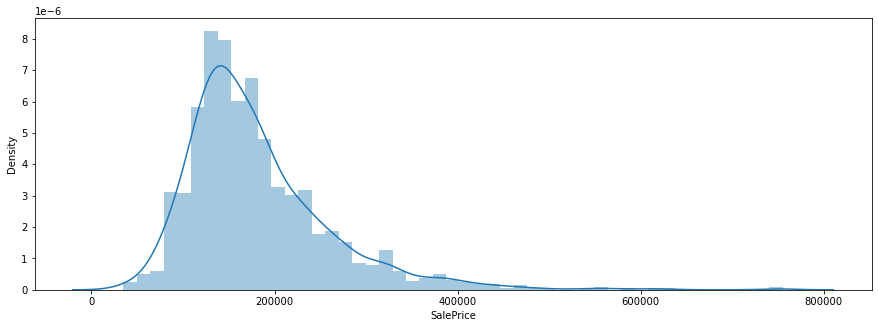

In [29]:
#plotting distribution of 'SalePrice'
plt.figure(figsize=(15,5))
sns.distplot(housing['SalePrice'])
plt.show()

#### As we can see in the plotted graph above the data for SalePrice is skewed and hence lets take a log and check if it will transform the data to be normally distributed

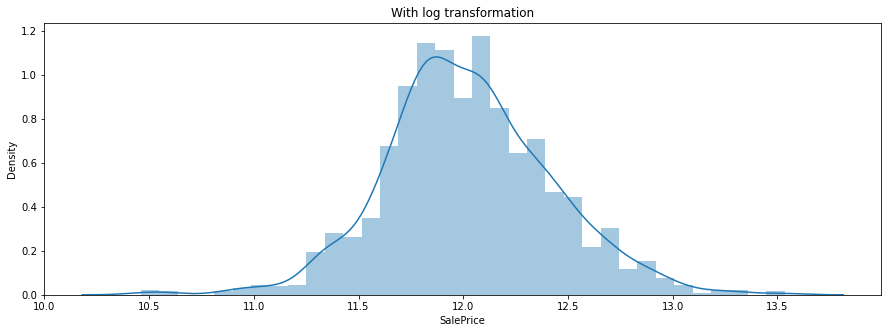

In [30]:
plt.figure(figsize=(15,5))
sns.distplot(np.log(housing['SalePrice']))
plt.title('With log transformation')
plt.show()

In [31]:
# From above, we note that by applying log transformation on dependent column, we get normal distribution of data 
# from originally right skewed distribution.So we need to apply this transformation on SalePrice column for model building
housing['SalePrice']=np.log(housing['SalePrice'])

## Step 4: Data preparation
- Converting ordered categorical data into numeric data
- Creating Dummy variables for unordered categorical variables

In [32]:
# converting ordered categorical data into numeric data
print(categorical_features)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [33]:
# for the few variables where ordering is possible - convert to numeric sequence as per order
    
for col in ('ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageCond', 'ExterCond', 'BsmtCond', 'GarageQual'):    
    housing[col] = housing[col].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })    

In [34]:
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing['LotShape'] = housing['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,'None': 0})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,'None': 0})
housing['GarageFinish'] = housing['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing['PavedDrive']= housing['PavedDrive'].map({'Y': 2, 'P': 1, 'N': 0 })
housing['CentralAir'] = housing['CentralAir'].map({'Y': 1, 'N': 0})
housing['Functional'] = housing['Functional'].map({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})

In [35]:
# for the unordered categorical variables create dummy columns
unordered_categorical = housing.select_dtypes('object').columns

for i in unordered_categorical:
    dum_df = pd.get_dummies(housing[i], prefix=i, drop_first=True)
    housing = pd.concat([housing,dum_df], axis=1)              # concat the dummy variables created

# drop the original unordered categorical columns post dummy columns have been created
housing = housing.drop(unordered_categorical, axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 167 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(42), uint8(121)
memory usage: 740.9 KB


## Step 5: Train test split
- Split into test & train
- Scaling

In [36]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size=0.7, test_size = 0.3, random_state=100)

In [37]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# storing column names in cols
cols = housing.columns

#scaler fit_transform on train data
df_train[cols] = scaler.fit_transform(df_train[cols])

#scaler transform on test data
df_test[cols] = scaler.transform(df_test[cols])

In [38]:
#Storing all feature variables to X_train and X_test

X_train = df_train.drop('SalePrice',axis=1)
y_train = df_train['SalePrice']

X_test = df_test.drop('SalePrice',axis=1)
y_test = df_test['SalePrice']

## Step 6: RFE for feature selection

In [39]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# check initial R2 score on the linear regresison
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

print('***** Linear regression *****')
# Print R2 score
print('Train R2 score: ', r2_score(y_train, y_train_pred))
print('Test R2 score: ', r2_score(y_test, y_test_pred))

# RSS
print('Train RSS: ', np.sum(np.square(y_train - y_train_pred)))
print('Test RSS: ', np.sum(np.square(y_test - y_test_pred)))

# Print mean squared error (MSE)
mse_train_r = mean_squared_error(y_train, y_train_pred)
mse_test_r = mean_squared_error(y_test, y_test_pred)
print('Train MSE: ', mse_train_r)
print('Test MSE: ', mse_test_r)

##Print Root Mean Squared Error (RMSE)
print('Train RMSE: ',mse_train_r ** 0.5)
print('Test RMSE: ',mse_test_r ** 0.5)

***** Linear regression *****
Train R2 score:  0.9228084960505771
Test R2 score:  -1.1542093488636436e+22
Train RSS:  78.81252553236075
Test RSS:  5.291785062223913e+24
Train MSE:  0.07719150394942287
Test MSE:  1.2081701055305737e+22
Train RMSE:  0.27783359039076405
Test RMSE:  109916791507.51143


In [41]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

0.00012791514650216477
[-7.08777022e-02 -3.74405518e-02  4.79380753e-02  1.27330763e-02
  1.72715024e-01  8.66789978e-02 -1.58857187e-02 -7.92632076e-03
 -7.87732721e-03  4.81344294e-02  6.00483309e-03  5.67977162e-02
  6.06411859e-02 -9.13796314e+11 -5.69267911e-03 -3.35788519e+11
 -8.81820602e+11  9.02400248e+11  2.64931417e-02  3.06176771e-02
 -9.00732730e-03  3.15072872e-01  7.36212586e-02  1.27668302e-02
  5.11926377e-02  3.74360272e-02  4.61391163e-02  3.38790979e-02
  3.86490178e-02 -1.80853886e-02  8.05664514e-02  4.18561397e-02
  1.24100728e-01  1.28317890e-01 -1.16592969e-02  1.56227522e-02
  2.73639983e-02  1.56839366e-03  1.92300936e-02  2.24451137e-02
 -5.40134179e-03 -6.09664711e-02 -3.93805696e-02  4.96945633e-01
  1.10010904e-02  2.15535889e-01  1.28277513e-01  4.42719234e-01
  3.53226307e-01  3.97463378e-02  5.01929419e-02  7.17990536e-02
  2.11632597e-02 -2.41304432e-02 -1.50914478e-02 -1.17486973e-02
  1.20662522e-02 -1.14021123e-02  7.33805122e-04 -2.05247619e-03
  

In [42]:
# running RFE for determining top 50 columns
rfe = RFE(lm, 50)             
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', False, 3),
 ('LotShape', False, 99),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 27),
 ('ExterQual', False, 104),
 ('ExterCond', False, 59),
 ('BsmtQual', False, 4),
 ('BsmtCond', False, 92),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 75),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('CentralAir', False, 23),
 ('2ndFlrSF', False, 107),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 64),
 ('FullBath', False, 6),
 ('HalfBath', False, 7),
 ('BedroomAbvGr', True, 1),
 ('KitchenQual', False, 9),
 ('Functional', True, 1),
 ('Fireplaces', False, 30),
 ('FireplaceQu', True, 1),
 ('GarageFinish', True, 1),
 ('GarageCars', True, 1),
 ('GarageQual', False, 2),
 ('GarageCond', False, 79),
 ('PavedDrive', False, 80),
 ('WoodDeckSF', False, 14),
 ('O

In [44]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['LotArea', 'LotShape', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtFinType2', 'CentralAir', '2ndFlrSF',
       ...
       'GarageType_Detchd', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family'],
      dtype='object', length=116)

In [45]:
len(X_train.columns)

166

In [46]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_lm).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     64.27
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:04:21   Log-Likelihood:                -141.00
No. Observations:                1021   AIC:                             604.0
Df Residuals:                     860   BIC:                             1397.
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.378e-

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [49]:
len(X_train.columns)
len(X_test.columns)

50

In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# generic function to get vif
def get_vif (X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

get_vif(X_train)

,Features,VIF
49,SaleCondition_Partial,inf
47,SaleType_New,inf
41,Exterior2nd_CBlock,inf
40,Exterior2nd_AsphShn,inf
6,BsmtFinSF1,inf
7,BsmtFinSF2,inf
8,BsmtUnfSF,inf
9,TotalBsmtSF,inf
39,Exterior1st_CBlock,inf
37,Exterior1st_AsphShn,inf


## Step 7: Model building and evaluation

### Ridge 

In [51]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [52]:
# Printing the best hyperparameter alpha
ridge_model_cv.best_params_

{'alpha': 4.0}

In [53]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
15,4.0,0.909015,0.878506,1
16,5.0,0.908874,0.878503,2
17,6.0,0.908726,0.878483,3
14,3.0,0.909146,0.878482,4
18,7.0,0.908575,0.878452,5
13,2.0,0.909258,0.878417,6
19,8.0,0.908423,0.878415,7
20,9.0,0.908272,0.878374,8
21,10.0,0.908122,0.878330,9
12,1.0,0.909344,0.878275,10


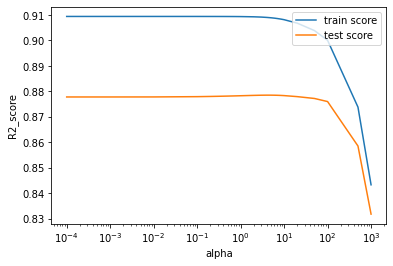

In [54]:
#plotting R2 score vs alpha value
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'], label='Train')
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [55]:
# checking with alpha = 4
alpha=4
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)

print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.91
test R2 score is 0.88


In [56]:
# checking with alpha = 5
alpha=5
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)

print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.91
test R2 score is 0.88


In [57]:
# checking with alpha = 10
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)

print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.91
test R2 score is 0.88


In [58]:
# On basis of above R2 score we go by alpha as 4
alpha=4
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)

#print ridge coeff
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 'Abs Coeff':abs(ridge.coef_.round(4))})
ridge_df = ridge_df.sort_values(by='Abs Coeff', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient,Abs Coeff
0,MSZoning_RL,0.3810,0.3810
1,GrLivArea,0.3377,0.3377
2,MSZoning_RM,0.2702,0.2702
3,OverallQual,0.2012,0.2012
4,MSZoning_FV,0.1718,0.1718
5,HouseAge,-0.1249,0.1249
6,GarageCars,0.1245,0.1245
7,OverallCond,0.1157,0.1157
8,MSZoning_RH,0.1099,0.1099
9,MSSubClass,-0.0871,0.0871


In [59]:
print('***** Ridge regression *****')
# Print R2 score
print('Train R2 score: ', r2_score(y_train, y_train_pred))
print('Test R2 score: ', r2_score(y_test, y_test_pred))

# RSS
print('Train RSS: ', np.sum(np.square(y_train - y_train_pred)))
print('Test RSS: ', np.sum(np.square(y_test - y_test_pred)))

# Print mean squared error (MSE)
mse_train_r = mean_squared_error(y_train, y_train_pred)
mse_test_r = mean_squared_error(y_test, y_test_pred)
print('Train MSE: ', mse_train_r)
print('Test MSE: ', mse_test_r)

##Print Root Mean Squared Error (RMSE)
print('Train RMSE: ',mse_train_r ** 0.5)
print('Test RMSE: ',mse_test_r ** 0.5)

***** Ridge regression *****
Train R2 score:  0.9064840883963068
Test R2 score:  0.8814622187254347
Train RSS:  95.47974574737083
Test RSS:  54.34685318356537
Train MSE:  0.09351591160369327
Test MSE:  0.12407957347845976
Train RMSE:  0.30580371417576546
Test RMSE:  0.3522493058594435


In [60]:
# doubling the alpha value to 8 for Ridge 
alpha=8
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)

print('***** Ridge regression for 8.0 *****')
# Print R2 score
print('Train R2 score: ', r2_score(y_train, y_train_pred))
print('Test R2 score: ', r2_score(y_test, y_test_pred))

# RSS
print('Train RSS: ', np.sum(np.square(y_train - y_train_pred)))
print('Test RSS: ', np.sum(np.square(y_test - y_test_pred)))

# Print mean squared error (MSE)
mse_train_r = mean_squared_error(y_train, y_train_pred)
mse_test_r = mean_squared_error(y_test, y_test_pred)
print('Train MSE: ', mse_train_r)
print('Test MSE: ', mse_test_r)

##Print Root Mean Squared Error (RMSE)
print('Train RMSE: ',mse_train_r ** 0.5)
print('Test RMSE: ',mse_test_r ** 0.5)

#print ridge coeff
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 'Abs Coeff':abs(ridge.coef_.round(4))})
#ridge_df = ridge_df[ridge_df['Coefficient'] != 0.00]
ridge_df = ridge_df.sort_values(by='Abs Coeff', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

***** Ridge regression for 8.0 *****
Train R2 score:  0.906035334264575
Test R2 score:  0.8815728066216338
Train RSS:  95.93792371586885
Test RSS:  54.29615117030014
Train MSE:  0.09396466573542492
Test MSE:  0.12396381545730627
Train RMSE:  0.30653656508714405
Test RMSE:  0.3520849548863261


,Features,Coefficient,Abs Coeff
0,GrLivArea,0.3324,0.3324
1,MSZoning_RL,0.3265,0.3265
2,MSZoning_RM,0.2219,0.2219
3,OverallQual,0.2027,0.2027
4,MSZoning_FV,0.1439,0.1439
5,HouseAge,-0.1259,0.1259
6,GarageCars,0.1239,0.1239
7,OverallCond,0.1162,0.1162
8,MSZoning_RH,0.0948,0.0948
9,Neighborhood_NridgHt,0.0850,0.0850


### Lasso 

In [61]:
lasso=Lasso()
# use lambda instead
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}
folds=5
lasso_model_cv=GridSearchCV(estimator=lasso,
                           param_grid=params,
                           scoring='r2',
                            cv=folds,
                            return_train_score=True,
                           verbose=1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100, 500, 1000, 10000]},
             return_train_score=True, scoring='r2', verbose=1)

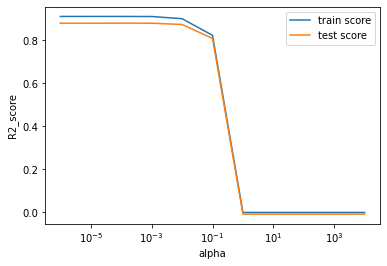

In [62]:
cv_results= pd.DataFrame(lasso_model_cv.cv_results_)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [63]:
# Printing the best hyperparameter alpha
lasso_model_cv.best_params_

{'alpha': 0.0001}

In [64]:
alph= 0.0001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)

y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)

print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.91
test R2 score is 0.88


In [65]:
alph= 0.001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)

y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)

print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.91
test R2 score is 0.88


In [66]:
# checking post doubling the alpha to 0.0002 for Lasso
alph= 0.0002
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)

y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)

print('***** Lasso regression for 0.0002 *****')
# Print R2 score
print('Train R2 score: ', r2_score(y_train, y_train_pred))
print('Test R2 score: ', r2_score(y_test, y_test_pred))

# RSS
print('Train RSS: ', np.sum(np.square(y_train - y_train_pred)))
print('Test RSS: ', np.sum(np.square(y_test - y_test_pred)))

# Print mean squared error (MSE)
mse_train_r = mean_squared_error(y_train, y_train_pred)
mse_test_r = mean_squared_error(y_test, y_test_pred)
print('Train MSE: ', mse_train_r)
print('Test MSE: ', mse_test_r)

##Print Root Mean Squared Error (RMSE)
print('Train RMSE: ',mse_train_r ** 0.5)
print('Test RMSE: ',mse_test_r ** 0.5)

#print coeff
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 'Abs Coeff':abs(lasso.coef_.round(4))})
lasso_df = lasso_df.sort_values(by='Abs Coeff', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

***** Lasso regression for 0.0002 *****
Train R2 score:  0.9067125512223394
Test R2 score:  0.8812890409856557
Train RSS:  95.24648520199153
Test RSS:  54.42625120415619
Train MSE:  0.09328744877766065
Test MSE:  0.12426084749807349
Train RMSE:  0.3054299408664132
Test RMSE:  0.3525065212135422


,Features,Coefficient,Abs Coeff
0,MSZoning_RL,0.4461,0.4461
1,GrLivArea,0.3428,0.3428
2,MSZoning_RM,0.3272,0.3272
3,MSZoning_FV,0.2055,0.2055
4,OverallQual,0.1997,0.1997
5,MSZoning_RH,0.1275,0.1275
6,GarageCars,0.1249,0.1249
7,HouseAge,-0.1235,0.1235
8,OverallCond,0.1145,0.1145
9,MSSubClass,-0.0891,0.0891


In [67]:
# alpha - 0.001 gives better results
alph= 0.0001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)

y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)

In [68]:
print('***** Lasso regression *****')
# Print R2 score
print('Train R2 score: ', r2_score(y_train, y_train_pred))
print('Test R2 score: ', r2_score(y_test, y_test_pred))

# RSS
print('Train RSS: ', np.sum(np.square(y_train - y_train_pred)))
print('Test RSS: ', np.sum(np.square(y_test - y_test_pred)))

# Print mean squared error (MSE)
mse_train_r = mean_squared_error(y_train, y_train_pred)
mse_test_r = mean_squared_error(y_test, y_test_pred)
print('Train MSE: ', mse_train_r)
print('Test MSE: ', mse_test_r)

##Print Root Mean Squared Error (RMSE)
print('Train RMSE: ',mse_train_r ** 0.5)
print('Test RMSE: ',mse_test_r ** 0.5)

***** Lasso regression *****
Train R2 score:  0.9067207353286573
Test R2 score:  0.881111125222871
Train RSS:  95.238129229441
Test RSS:  54.507821499593945
Train MSE:  0.0932792646713428
Test MSE:  0.12444708104930124
Train RMSE:  0.3054165428907589
Test RMSE:  0.3527705784916044


In [69]:
#get dictionary containing all the variables and coefficients after lasso regression
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 'Abs Coeff':abs(lasso.coef_.round(4))})
#lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df = lasso_df.sort_values(by='Abs Coeff', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient,Abs Coeff
0,MSZoning_RL,0.4535,0.4535
1,GrLivArea,0.3432,0.3432
2,MSZoning_RM,0.3339,0.3339
3,MSZoning_FV,0.2093,0.2093
4,OverallQual,0.1993,0.1993
5,MSZoning_RH,0.1296,0.1296
6,GarageCars,0.1251,0.1251
7,HouseAge,-0.1231,0.1231
8,OverallCond,0.1144,0.1144
9,MSSubClass,-0.0895,0.0895


In [70]:
import operator

lasso_dict=dict(zip(X_train.columns,lasso.coef_))

#filter dictionary for only non-zero coefficients
final_dict={}
for i in lasso_dict:
    if lasso_dict[i]!=0:
        final_dict[i]= round(lasso_dict[i],3)    #rounding coefficient to 3 significant digits


final_dict= dict(sorted(final_dict.items(), key=operator.itemgetter(1), reverse=True))

#printing the final model equation
a= ' + '.join(([str(b)+' X '+str(a) for a,b in final_dict.items()]))
print("Sales Price = {0}+ [ {1} ]".format(round(lasso.intercept_,3),a))

Sales Price = -0.0+ [ 0.453 X MSZoning_RL + 0.343 X GrLivArea + 0.334 X MSZoning_RM + 0.209 X MSZoning_FV + 0.199 X OverallQual + 0.13 X MSZoning_RH + 0.125 X GarageCars + 0.114 X OverallCond + 0.087 X Neighborhood_NridgHt + 0.08 X FireplaceQu + 0.078 X Neighborhood_Somerst + 0.073 X BsmtFullBath + 0.068 X Neighborhood_Crawfor + 0.065 X BsmtFinType1 + 0.065 X LandContour_Lvl + 0.063 X Foundation_PConc + 0.062 X BsmtExposure + 0.062 X LandContour_Low + 0.061 X Condition1_Norm + 0.048 X Foundation_CBlock + 0.046 X GarageFinish + 0.045 X Exterior1st_BrkFace + 0.045 X SaleCondition_Normal + 0.044 X LandContour_HLS + 0.043 X Neighborhood_ClearCr + 0.042 X SaleType_ConLD + 0.041 X Neighborhood_NoRidge + 0.04 X Functional + 0.039 X HeatingQC + 0.039 X BedroomAbvGr + 0.036 X Neighborhood_StoneBr + 0.028 X SaleCondition_Partial + 0.02 X GarageType_None + 0.02 X SaleType_New + 0.016 X BsmtUnfSF + 0.014 X TotalBsmtSF + 0.01 X BsmtFinSF2 + -0.0 X Exterior2nd_AsphShn + -0.0 X Exterior2nd_CBlock + -

### Residual analysis

Text(0.5, 0, 'error')

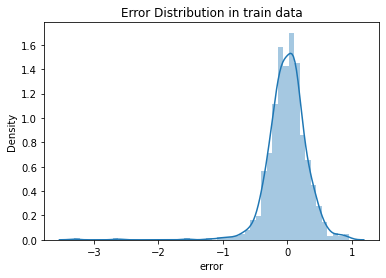

In [71]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Distribution in train data')
plt.xlabel('error')

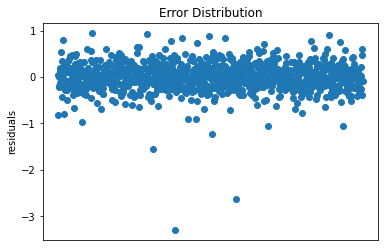

In [72]:
x= [i for i in range (1,y_train.shape[0]+1,1)]
plt.scatter(x,y_train-y_train_pred)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

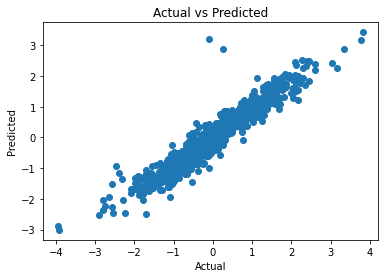

In [73]:
#plt.plot([-4,4],[-4,4], label='actual')
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Residual Analysis of the test data

Text(0.5, 0, 'error')

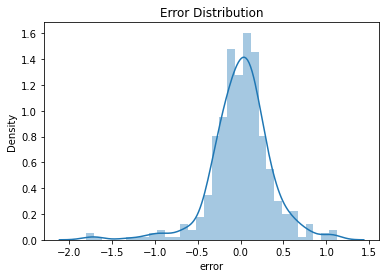

In [74]:
sns.distplot(y_test-y_test_pred)
plt.title('Error Distribution')
plt.xlabel('error')

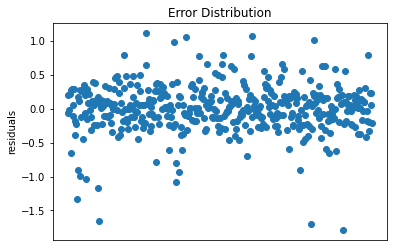

In [75]:
x= [i for i in range (1,439,1)]
plt.scatter(x,y_test-y_test_pred)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

<b>Observation: </b> Error terms are normally distributed & are independent of each other

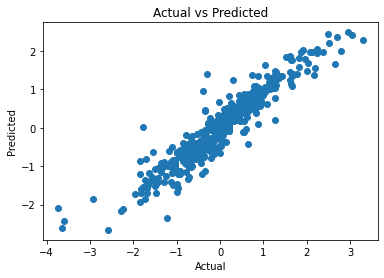

In [76]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

<b>Observation: </b> 
- Residual analysis for both test and train data seem to fit the assumptions of the Linear Regression.
- Residuals have mean of zero and normally distributed.
- Residuals do not have any pattern hence it has homoscedasticity.

# Removing the top 5 contributors from the lasso regression:

In [77]:
X_train_new = X_train.drop(['GrLivArea', 'OverallQual', 'MSZoning_RM', 'MSZoning_RL', 'MSZoning_FV'], axis=1)
X_test_new = X_train.drop(['GrLivArea', 'OverallQual', 'MSZoning_RM', 'MSZoning_RL', 'MSZoning_FV'], axis=1)

In [78]:
lasso_model_cv.fit(X_train_new, X_test_new)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100, 500, 1000, 10000]},
             return_train_score=True, scoring='r2', verbose=1)

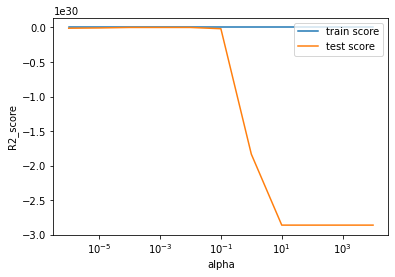

In [79]:
cv_results= pd.DataFrame(lasso_model_cv.cv_results_)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [80]:
# Printing the best hyperparameter alpha
lasso_model_cv.best_params_

{'alpha': 0.0001}

In [81]:
#get dictionary containing all the variables and coefficients after lasso regression
lasso_dict=dict(zip(X_train_new.columns,lasso.coef_))
#filter dictionary for only non-zero coefficients
final_dict={}
for i in lasso_dict:
    if lasso_dict[i]!=0:
        final_dict[i]= round(lasso_dict[i],3)    #rounding coefficient to 3 significant digits
#final_dict

final_dict= dict(sorted(final_dict.items(), key=operator.itemgetter(1), reverse=True))
final_dict


{'Neighborhood_ClearCr': 0.453,
 'BedroomAbvGr': 0.343,
 'Neighborhood_Crawfor': 0.334,
 'LandContour_Low': 0.209,
 'OverallCond': 0.199,
 'LandContour_Lvl': 0.13,
 'RemodelAge': 0.125,
 'BsmtExposure': 0.114,
 'Exterior1st_AsphShn': 0.087,
 'GarageCars': 0.08,
 'Exterior1st_BrkFace': 0.078,
 'Functional': 0.073,
 'Neighborhood_StoneBr': 0.068,
 'BsmtFinSF1': 0.065,
 'Neighborhood_NridgHt': 0.065,
 'SaleCondition_Partial': 0.063,
 'BsmtFinType1': 0.062,
 'Neighborhood_NoRidge': 0.062,
 'Exterior2nd_AsphShn': 0.061,
 'SaleCondition_Normal': 0.048,
 'HouseAge': 0.046,
 'Foundation_CBlock': 0.045,
 'Neighborhood_Edwards': 0.044,
 'Neighborhood_Somerst': 0.043,
 'BldgType_Twnhs': 0.041,
 'GarageFinish': 0.04,
 'BsmtFullBath': 0.039,
 'FireplaceQu': 0.039,
 'Exterior1st_CBlock': 0.036,
 'TotalBsmtSF': 0.016,
 'HeatingQC': 0.014,
 'BsmtUnfSF': 0.01,
 'GarageType_None': -0.0,
 'SaleType_ConLD': -0.0,
 'Exterior2nd_Other': -0.004,
 'Foundation_PConc': -0.005,
 'Exterior2nd_CBlock': -0.041,
 'L

# Conclusion

- Optimal alpha value for Ridge is - 4
- Optimal alpha value for Lasso is - 0.001

- The Mean Squared Error of Lasso is slightly lower than that of Ridge

- Since Lasso helps in feature reduction - Lasso has a better edge over Ridge.

As per the final Lasso model the top 5 important predictors are:
- GrLivArea
- MSZoning_RL
- OverallQual
- MSZoning_RM
- MSZoning_FV

